In [1]:
from flags import Flags
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import sys
sys.path.insert(1,'../..')
from src import PositionElgibility

In [2]:
projections = pd.read_csv('../../data/raw/projections-espn-2017.csv')

In [3]:
projections['position_elgibility'] = projections['position_elgibility'].apply(lambda x: PositionElgibility(x))

In [4]:
projections[projections['position_elgibility'] & PositionElgibility.catcher]

,player_id,name,position_elgibility,at_bats,runs,home_runs,runs_batted_in,batter_walks,batter_strikeouts,stolen_bases,...,games_started,innings_pitched,walks,strikeouts,wins,saves,holds,earned_run_avg,walks_hits_per_inning,strikeouts_per_9
52,2380,Buster Posey,(((PositionElgibility.catcher))),514.0,75.0,16.0,82.0,56.0,61.0,4.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
72,3557,Gary Sanchez,(((PositionElgibility.catcher))),453.0,55.0,25.0,69.0,35.0,108.0,7.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
81,2816,Jonathan Lucroy,(((PositionElgibility.catcher))),514.0,71.0,19.0,77.0,51.0,86.0,4.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
87,5020,Willson Contreras,"(((PositionElgibility.catcher)), ((PositionElg...",428.0,53.0,15.0,56.0,43.0,87.0,5.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
95,4653,J.T. Realmuto,(((PositionElgibility.catcher))),510.0,58.0,10.0,50.0,28.0,92.0,12.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
103,3389,Yasmani Grandal,(((PositionElgibility.catcher))),391.0,50.0,23.0,65.0,63.0,112.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
109,5444,Evan Gattis,"(((PositionElgibility.catcher)), ((PositionElg...",409.0,51.0,25.0,65.0,31.0,102.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
111,3590,Salvador Perez,(((PositionElgibility.catcher))),518.0,54.0,20.0,65.0,19.0,100.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
121,1212,Brian McCann,"(((PositionElgibility.catcher)), ((PositionElg...",415.0,50.0,16.0,59.0,41.0,90.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
127,2122,Matt Wieters,(((PositionElgibility.catcher))),411.0,46.0,16.0,61.0,31.0,90.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN


## Calculating hits from average

In [5]:
projections['hits'] = projections['batting_avg'] * projections['at_bats']

## Calculating earned runs from ERA

In [6]:
projections['earned_runs'] = (projections['innings_pitched'] * projections['earned_run_avg']) / 9

## Calculating hits against from WHIP

In [7]:
projections['hits_against'] = (projections['walks_hits_per_inning'] * projections['innings_pitched']) - projections['walks']

# Calculating Standing Gain Points

In [8]:
razz = pd.read_csv('../../data/raw/razzball-2016.csv')

In [9]:
from scipy.stats import linregress

l = pd.DataFrame(razz[razz['League'] == 'All Hail Beddict Tha God'])
razz['run_rank'] = razz.groupby('League')['R'].rank(ascending=False)

In [10]:
razz.sort_values('run_rank')

,#,Team,League,RCL PTS,Lg PTS,Lg Index,Master PTS,R,HR,RBI,...,SV,ERA,WHIP,K,IP,K/9,AB,GS,Moves,run_rank
0,1,Team Levy,All Hail Beddict Tha God,114.6,120.0,98,113.3,1169,375,1172,...,177,3.14,1.15,1437,1368,9.5,7836,155,345,1.0
131,132,Vinyl Ross,2016 Shades of Grey,90.4,90.5,100,90.1,1178,377,1213,...,131,3.74,1.27,1381,1340,9.3,8009,175,176,1.0
128,129,Vin Reds,The Third Greatest,90.8,90.5,100,91.2,1160,332,1123,...,144,3.58,1.22,1423,1447,8.9,7924,186,238,1.0
261,262,Thomaston Herbivore Club,Prospecter Ralph`s Cavern,80.1,80.5,101,78.9,1102,285,963,...,157,3.48,1.20,1426,1396,9.2,7428,180,119,1.0
113,114,Buchard Black Sox,Sultans of Swat,92.1,95.0,100,89.2,1123,323,1036,...,69,3.68,1.22,1351,1350,9.0,7402,180,32,1.0
269,270,The People’s Champ,The Heat Is On,79.5,75.0,104,79.5,1123,301,1017,...,157,3.89,1.27,1295,1307,8.9,7453,139,323,1.0
105,106,Team Albright,Razzball `Perty `Perts,92.6,85.5,107,90.8,1167,308,1111,...,128,3.69,1.27,1603,1550,9.3,8061,185,622,1.0
270,271,naples cardinals,Mighty Minions,79.5,78.5,100,80.7,1183,319,1136,...,49,3.83,1.25,1260,1285,8.8,7947,181,62,1.0
202,203,Barry Feete,League Of Shadows,84.5,85.5,98,85.6,1171,297,1074,...,111,3.62,1.26,1364,1345,9.1,7851,180,82,1.0
96,97,Vindaloo Ross,RCL Lords of the Diamond,93.3,103.0,94,92.2,1126,351,1108,...,167,3.32,1.24,1396,1443,8.7,7876,185,217,1.0


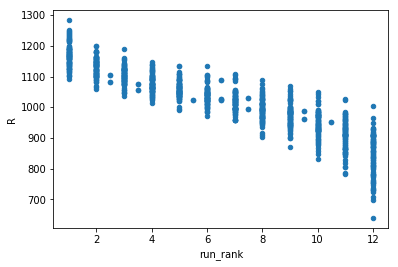

In [11]:
razz.plot.scatter(y='R', x='run_rank')

In [12]:
slope = linregress(razz['run_rank'], razz['R'])
slope[0]

-25.968797596015314

In [13]:
run_sgp = abs(slope[0])
run_sgp

25.968797596015314

## Final product

Here is a function which, given a data frame and a stat name, calculates the SGP for that stat.

In [14]:
def stat_sgp(df, stat, asc=False):
    return linregress(df.groupby('League')[stat].rank(ascending=asc), df[stat])[0] * -1

r_sgp = stat_sgp(razz, 'R')
hr_sgp = stat_sgp(razz, 'HR')
rbi_sgp = stat_sgp(razz, 'RBI')
sb_sgp = stat_sgp(razz, 'SB')
avg_sgp = stat_sgp(razz, 'AVG')
w_sgp = stat_sgp(razz, 'W')
sv_sgp = stat_sgp(razz, 'SV')
era_sgp = stat_sgp(razz, 'ERA', True)
whip_sgp = stat_sgp(razz, 'WHIP', True)
k_sgp = stat_sgp(razz, 'K')

In [15]:
era_sgp

-0.077205639841688656

# Player SGP Added (SGPA)

## Batting SGPA

In [16]:
f = projections.loc[0,:]
f

player_id                                             3280
name                                            Mike Trout
position_elgibility      (((PositionElgibility.outfield)))
at_bats                                                565
runs                                                   116
home_runs                                               33
runs_batted_in                                          99
batter_walks                                           104
batter_strikeouts                                      151
stolen_bases                                            23
batting_avg                                          0.301
on_base_percent                                      0.415
slugging_avg                                         0.561
on_base_plus_slugging                                0.977
games                                                  NaN
games_started                                          NaN
innings_pitched                                        N

In [17]:
r_sgp

25.968797596015314

In [18]:
num_batters = 13
num_teams = 10

projections['runs_sgpa'] = projections['runs'] / r_sgp
projections['home_runs_sgpa'] = projections['home_runs'] / hr_sgp
projections['runs_batted_in_sgpa'] = projections['runs_batted_in'] / rbi_sgp
projections['stolen_bases_sgpa'] = projections['stolen_bases'] / sb_sgp

avg_h = projections.sort_values('hits', ascending=False).head(num_batters*num_teams).loc[:,'hits'].mean() * (num_batters -1)
avg_h

1878.7687384615385

In [19]:
avg_ab = projections.sort_values('at_bats', ascending=False).head(num_batters*num_teams).loc[:,'at_bats'].mean() * (num_batters -1)
avg_ab

6860.8615384615387

In [20]:
avg_avg = avg_h / avg_ab
avg_avg

0.27383860291149797

In [21]:
with_trout = (avg_h + f['hits']) / (avg_ab + f['at_bats'])
projections['batting_avg_sgpa'] = (((avg_h + projections['hits']) / (avg_ab + projections['at_bats'])) - avg_avg) / avg_sgp

## Pitching SGPA

In [22]:
projections['wins_sgpa'] = projections['wins'] / w_sgp
projections['saves_sgpa'] = projections['saves'] / sv_sgp
projections['strikeouts_sgpa'] = projections['strikeouts'] / k_sgp

In [23]:
num_pitchers = 9

avg_er = projections.sort_values(['innings_pitched', 'earned_runs'], ascending=[False, True]).head(num_pitchers*num_teams).loc[:,'earned_runs'].mean() * (num_pitchers -1)
avg_er

608.1860740740741

In [24]:
avg_ip = projections.sort_values('innings_pitched', ascending=False).head(num_pitchers*num_teams).loc[:,'innings_pitched'].mean() * (num_pitchers -1)
avg_ip

1496.6222222222223

In [25]:
avg_era = (avg_er / avg_ip) * 9
avg_era

3.6573522599037833

In [26]:
projections['earned_run_avg_sgpa'] = (((avg_er + projections['earned_runs']) / (avg_ip + projections['innings_pitched']) * 9) - avg_era) / era_sgp

In [27]:
avg_bb = projections.sort_values(['innings_pitched', 'walks'], ascending=[False, True]).head(num_pitchers*num_teams).loc[:,'walks'].mean() * (num_pitchers -1)
avg_bb

428.26666666666665

In [28]:
avg_ha =projections.sort_values(['innings_pitched', 'hits_against'], ascending=[False, True]).head(num_pitchers*num_teams).loc[:,'hits_against'].mean() * (num_pitchers - 1)
avg_ha

1400.144888888889

In [29]:
avg_whip = (avg_bb + avg_ha) / avg_ip
avg_whip

1.2216921066698343

In [30]:
whip_sgp

-0.015328138672444699

In [31]:
projections['walks_hits_per_inning_sgpa'] = ((((avg_bb + projections['walks']) + (avg_ha + projections['hits_against'])) / (avg_ip + projections['innings_pitched'])) - avg_whip) / whip_sgp

## Total SGPA

In [32]:
projections['total_sgpa'] = (projections['runs_sgpa'].fillna(0) + 
    projections['home_runs_sgpa'].fillna(0) +
    projections['runs_batted_in_sgpa'].fillna(0) +
    projections['stolen_bases_sgpa'].fillna(0) +
    projections['batting_avg_sgpa'].fillna(0) +
    projections['wins_sgpa'].fillna(0) +
    projections['saves_sgpa'].fillna(0) +
    projections['strikeouts_sgpa'].fillna(0) +
    projections['earned_run_avg_sgpa'].fillna(0))
projections

,player_id,name,position_elgibility,at_bats,runs,home_runs,runs_batted_in,batter_walks,batter_strikeouts,stolen_bases,...,home_runs_sgpa,runs_batted_in_sgpa,stolen_bases_sgpa,batting_avg_sgpa,wins_sgpa,saves_sgpa,strikeouts_sgpa,earned_run_avg_sgpa,walks_hits_per_inning_sgpa,total_sgpa
0,3280,Mike Trout,(((PositionElgibility.outfield))),565.0,116.0,33.0,99.0,104.0,151.0,23.0,...,3.335832,4.000585,2.413494,1.041297,0.000000,0.000000,0.000000,NaN,NaN,15.258107
1,4144,Jose Altuve,(((PositionElgibility.second_base))),639.0,96.0,17.0,80.0,49.0,65.0,29.0,...,1.718459,3.232796,3.043101,2.153467,0.000000,0.000000,0.000000,NaN,NaN,13.844567
2,5534,Mookie Betts,(((PositionElgibility.outfield))),635.0,110.0,25.0,96.0,50.0,82.0,24.0,...,2.527145,3.879356,2.518428,1.543542,0.000000,0.000000,0.000000,NaN,NaN,14.704323
3,5675,Kris Bryant,"(((PositionElgibility.third_base)), ((Position...",599.0,102.0,35.0,104.0,76.0,174.0,13.0,...,3.538004,4.202635,1.364149,0.411122,0.000000,0.000000,0.000000,NaN,NaN,13.443700
4,3486,Paul Goldschmidt,(((PositionElgibility.first_base))),570.0,104.0,25.0,98.0,111.0,150.0,26.0,...,2.527145,3.960175,2.728297,1.011155,0.000000,0.000000,0.000000,NaN,NaN,14.231579
5,3734,Nolan Arenado,(((PositionElgibility.third_base))),619.0,107.0,41.0,127.0,54.0,102.0,2.0,...,4.144518,5.132064,0.209869,0.965790,0.000000,0.000000,0.000000,NaN,NaN,14.572571
6,3559,Manny Machado,"(((PositionElgibility.third_base)), ((Position...",637.0,101.0,36.0,90.0,54.0,117.0,6.0,...,3.639089,3.636896,0.629607,0.777450,0.000000,0.000000,0.000000,NaN,NaN,12.572325
7,2197,Josh Donaldson,(((PositionElgibility.third_base))),589.0,119.0,36.0,107.0,95.0,123.0,7.0,...,3.639089,4.323865,0.734542,0.404801,0.000000,0.000000,0.000000,NaN,NaN,13.684719
8,3215,Anthony Rizzo,(((PositionElgibility.first_base))),590.0,96.0,33.0,104.0,78.0,113.0,7.0,...,3.335832,4.202635,0.734542,0.565031,0.000000,0.000000,0.000000,NaN,NaN,12.534784
9,3390,Bryce Harper,(((PositionElgibility.outfield))),521.0,95.0,29.0,89.0,114.0,127.0,16.0,...,2.931489,3.596486,1.678952,0.147990,0.000000,0.000000,0.000000,NaN,NaN,12.013153


## Top ten players by value add

In [33]:
projections.sort_values('total_sgpa', ascending=False).loc[:,['name', 'position_elgibility', 'total_sgpa']].head(10)

,name,position_elgibility,total_sgpa
0,Mike Trout,(((PositionElgibility.outfield))),15.258107
2,Mookie Betts,(((PositionElgibility.outfield))),14.704323
5,Nolan Arenado,(((PositionElgibility.third_base))),14.572571
4,Paul Goldschmidt,(((PositionElgibility.first_base))),14.231579
270,Clayton Kershaw,(((PositionElgibility.starting_pitcher))),13.858970
1,Jose Altuve,(((PositionElgibility.second_base))),13.844567
10,Charlie Blackmon,(((PositionElgibility.outfield))),13.819956
7,Josh Donaldson,(((PositionElgibility.third_base))),13.684719
3,Kris Bryant,"(((PositionElgibility.third_base)), ((Position...",13.443700
15,Starling Marte,(((PositionElgibility.outfield))),12.900908


# What does it take to win a category?

In [34]:
league_winners = razz.groupby('League').head(1)

In [58]:
league_winners[['R', 'HR', 'RBI', 'SB', 'AVG', 'W', 'SV', 'K', 'ERA', 'WHIP']].describe()

,R,HR,RBI,SB,AVG,W,SV,K,ERA,WHIP
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1139.929412,326.341176,1092.952941,160.811765,0.273040,93.458824,138.494118,1436.235294,3.494235,1.196000
std,48.868333,23.573872,41.362194,29.112873,0.005946,9.129430,29.348734,103.537737,0.196283,0.046706
min,1011.000000,276.000000,989.000000,93.000000,0.256400,74.000000,80.000000,1172.000000,3.130000,1.090000
25%,1104.000000,310.000000,1062.000000,137.000000,0.268500,87.000000,121.000000,1373.000000,3.340000,1.170000
50%,1139.000000,328.000000,1098.000000,159.000000,0.272900,93.000000,133.000000,1436.000000,3.490000,1.190000
75%,1169.000000,344.000000,1122.000000,181.000000,0.276800,99.000000,153.000000,1485.000000,3.610000,1.230000
max,1283.000000,376.000000,1172.000000,235.000000,0.286600,118.000000,240.000000,1801.000000,3.960000,1.300000
